<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GaussianDropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import img_to_array
from keras import utils, layers

In [3]:
from keras.src import callbacks
from keras.optimizers import Adam, Adamax
from keras.callbacks import EarlyStopping

In [4]:
num_classes = 10 # загальна кількість класів
img_row, img_col = 28, 28
image_shape = (img_row, img_col, 1)
img_size=32

In [5]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Підготовка даних
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_train_v = np.repeat(x_train, 3, axis=3)
x_test_v = np.repeat(x_test, 3, axis=3)
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
x_train_v.shape, x_test_v.shape, y_train.shape, y_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3), (60000, 10), (10000, 10))

In [ ]:
image = next(iter(x_train_v))

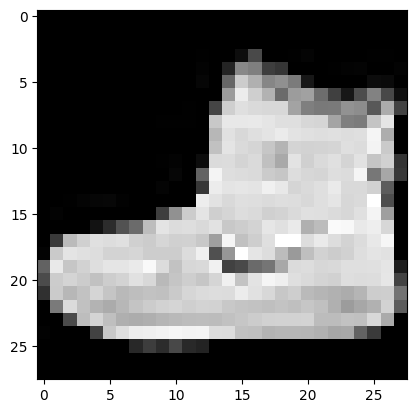

In [ ]:
_ = plt.imshow(image)

In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [ ]:
image.shape

(28, 28, 3)

In [6]:
resize_and_rescale = Sequential([
    layers.Resizing(img_size,img_size),
    layers.Rescaling(1./255)
])

In [ ]:
x_train_prepared = resize_and_rescale(x_train_v)
x_test_prepared = resize_and_rescale(x_test_v)

In [ ]:
x_train_prepared.shape, x_test_prepared.shape

(TensorShape([60000, 32, 32, 3]), TensorShape([10000, 32, 32, 3]))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
x_train.shape[0]

60000

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


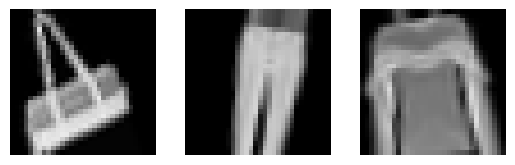

In [ ]:
datagen.fit(x_train_prepared)

for X_batch, y_batch in datagen.flow(x_train_prepared,y_train, batch_size=6):
    for i in range(0, 3):
        plt.subplot(1,3,i+1)
        plt.imshow(X_batch[i])
        print(X_batch[i].shape)
        plt.axis('off')
    break

In [ ]:
augmented_data = datagen.flow(x_train_prepared, y_train, batch_size=x_train.shape[0], shuffle=False)
x_train_augmented, y_train_augmented = next(augmented_data)

In [ ]:
X_train = np.concatenate([x_train_prepared, x_train_augmented])
y_train = np.concatenate([y_train, y_train_augmented])

In [ ]:
X_train.shape, y_train.shape

((120000, 32, 32, 3), (120000, 10))

0.0 0.9521753
0.0 0.9481465
0.0 0.9321079


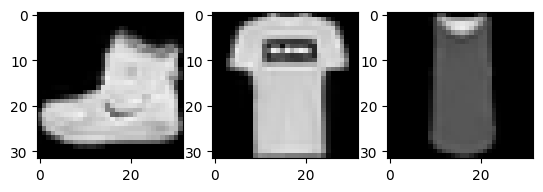

In [ ]:
itr = iter(X_train)

for i in range(0, 3):
  plt.subplot(1,3,i+1)
  image_n = next(itr)
  print(image_n.min(), image_n.max())
  plt.imshow(image_n)


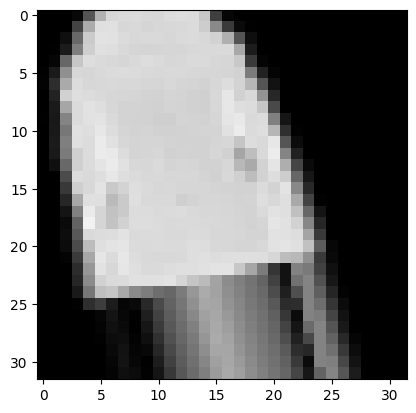

In [ ]:
plt.imshow(X_train[62000])


In [ ]:
X_train, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [ ]:
X_train.dtype

dtype('float32')

In [ ]:
X_train.shape

(102000, 32, 32, 3)

In [ ]:
# Створимо нейронну мережу "Simply model"
model_vgg0 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
model_vgg0.trainable = False

model_vgg1 = Sequential([
    model_vgg0,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model_vgg1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
model_vgg0.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
history = model_vgg1.fit(X_train, y_tr, batch_size=128,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/15
797/797 [==============================] - 908s 1s/step - loss: 0.7397 - accuracy: 0.7320 - val_loss: 0.5519 - val_accuracy: 0.7947
Epoch 2/15
797/797 [==============================] - 896s 1s/step - loss: 0.5796 - accuracy: 0.7867 - val_loss: 0.5115 - val_accuracy: 0.8127
Epoch 3/15
797/797 [==============================] - 925s 1s/step - loss: 0.5457 - accuracy: 0.7970 - val_loss: 0.4886 - val_accuracy: 0.8146
Epoch 4/15
797/797 [==============================] - 895s 1s/step - loss: 0.5201 - accuracy: 0.8062 - val_loss: 0.4878 - val_accuracy: 0.8179
Epoch 5/15
797/797 [==============================] - 896s 1s/step - loss: 0.5033 - accuracy: 0.8123 - val_loss: 0.4604 - val_accuracy: 0.8282
Epoch 6/15
797/797 [==============================] - 895s 1s/step - loss: 0.4892 - accuracy: 0.8167 - val_loss: 0.4792 - val_accuracy: 0.8209
Epoch 7/15
797/797 [==============================] - 916s 1s/step - loss: 0.4792 - accuracy: 0.8215 - val_loss: 0.4495 - val_accuracy: 0.8321

In [ ]:
score = model_vgg1.evaluate(x_test_prepared, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3694029450416565
Test accuracy:  0.8651999831199646


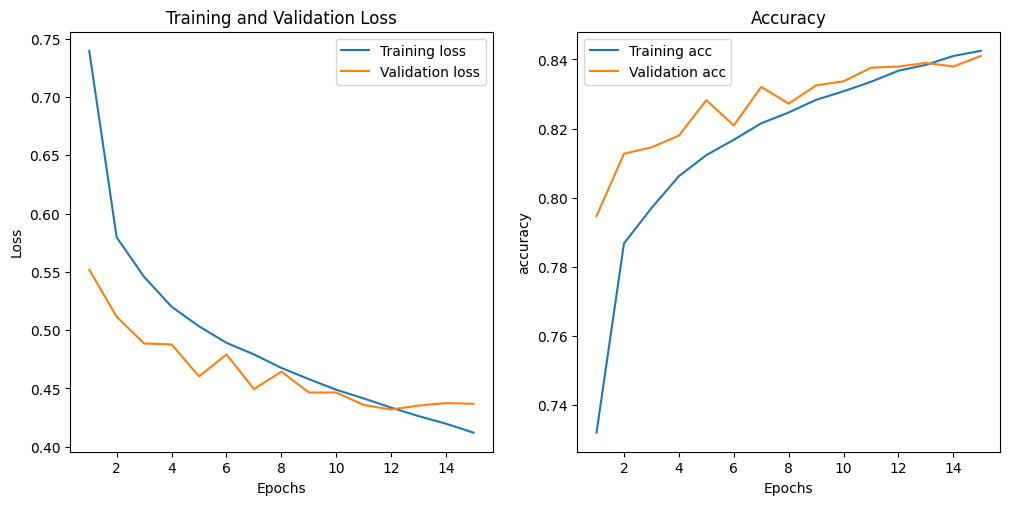

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model_vgg1.save("my_modelvgg1")

# Включимо один з блоків VGG16

In [ ]:
model_vgg0 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
model_vgg0.trainable = True
set_trainable = False
for layer in model_vgg0.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = Sequential([
    model_vgg0,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
modified_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
modified_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 15117226 (57.67 MB)
Trainable params: 74

In [ ]:
history2 = modified_model.fit(X_train, y_tr, batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/10
797/797 [==============================] - 39s 35ms/step - loss: 0.5755 - accuracy: 0.7920 - val_loss: 0.4407 - val_accuracy: 0.8388
Epoch 2/10
797/797 [==============================] - 23s 29ms/step - loss: 0.4155 - accuracy: 0.8469 - val_loss: 0.4052 - val_accuracy: 0.8523
Epoch 3/10
797/797 [==============================] - 23s 29ms/step - loss: 0.3769 - accuracy: 0.8621 - val_loss: 0.4073 - val_accuracy: 0.8516
Epoch 4/10
797/797 [==============================] - 23s 29ms/step - loss: 0.3460 - accuracy: 0.8730 - val_loss: 0.3730 - val_accuracy: 0.8624
Epoch 5/10
797/797 [==============================] - 23s 29ms/step - loss: 0.3227 - accuracy: 0.8806 - val_loss: 0.3649 - val_accuracy: 0.8696
Epoch 6/10
797/797 [==============================] - 23s 29ms/step - loss: 0.3030 - accuracy: 0.8868 - val_loss: 0.3757 - val_accuracy: 0.8679
Epoch 7/10
797/797 [==============================] - 23s 29ms/step - loss: 0.2856 - accuracy: 0.8940 - val_loss: 0.3707 - val_accuracy:

In [ ]:
score = modified_model.evaluate(x_test_prepared, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.29724133014678955
Test accuracy:  0.9014000296592712


# Новий розділ

In [7]:
# Підготовка даних
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_train_v = np.repeat(x_train, 3, axis=3)
x_test_v = np.repeat(x_test, 3, axis=3)
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [8]:
x_train_prepared = np.array(resize_and_rescale(x_train_v))
x_test_prepared = np.array(resize_and_rescale(x_test_v))

In [ ]:
# augmented_data = datagen.flow(x_train_prepared, y_train, batch_size=x_train.shape[0], shuffle=False)
# x_train_augmented, y_train_augmented = next(augmented_data)

In [ ]:
# X_train = np.concatenate([x_train_prepared, x_train_augmented])
# y_train = np.concatenate([y_train, y_train_augmented])

In [9]:
X_train, X_val, y_tr, y_val = train_test_split(x_train_prepared, y_train, test_size=0.15)

In [10]:
X_train.shape, X_val.shape, y_tr.shape, y_val.shape

((51000, 32, 32, 3), (9000, 32, 32, 3), (51000, 10), (9000, 10))

In [11]:
model_vgg0 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
model_vgg0.trainable = True
set_trainable = False
for layer in model_vgg0.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model2 = Sequential([
    model_vgg0,
    Flatten(),

    # Dense(1024, activation='relu'),
    # Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    # Dense(256, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
modified_model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [13]:
history3 = modified_model2.fit(X_train, y_tr, batch_size=1024,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/20
50/50 [==============================] - 34s 342ms/step - loss: 0.8410 - accuracy: 0.6965 - val_loss: 0.3868 - val_accuracy: 0.8611
Epoch 2/20
50/50 [==============================] - 9s 173ms/step - loss: 0.3646 - accuracy: 0.8701 - val_loss: 0.3034 - val_accuracy: 0.8911
Epoch 3/20
50/50 [==============================] - 9s 171ms/step - loss: 0.3038 - accuracy: 0.8919 - val_loss: 0.2815 - val_accuracy: 0.8992
Epoch 4/20
50/50 [==============================] - 8s 162ms/step - loss: 0.2667 - accuracy: 0.9049 - val_loss: 0.2707 - val_accuracy: 0.9036
Epoch 5/20
50/50 [==============================] - 8s 161ms/step - loss: 0.2488 - accuracy: 0.9106 - val_loss: 0.2549 - val_accuracy: 0.9059
Epoch 6/20
50/50 [==============================] - 8s 166ms/step - loss: 0.2289 - accuracy: 0.9173 - val_loss: 0.2586 - val_accuracy: 0.9073
Epoch 7/20
50/50 [==============================] - 8s 157ms/step - loss: 0.2141 - accuracy: 0.9221 - val_loss: 0.2371 - val_accuracy: 0.9143
Epoch

In [14]:
score = modified_model2.evaluate(x_test_prepared, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3551034927368164
Test accuracy:  0.9052000045776367


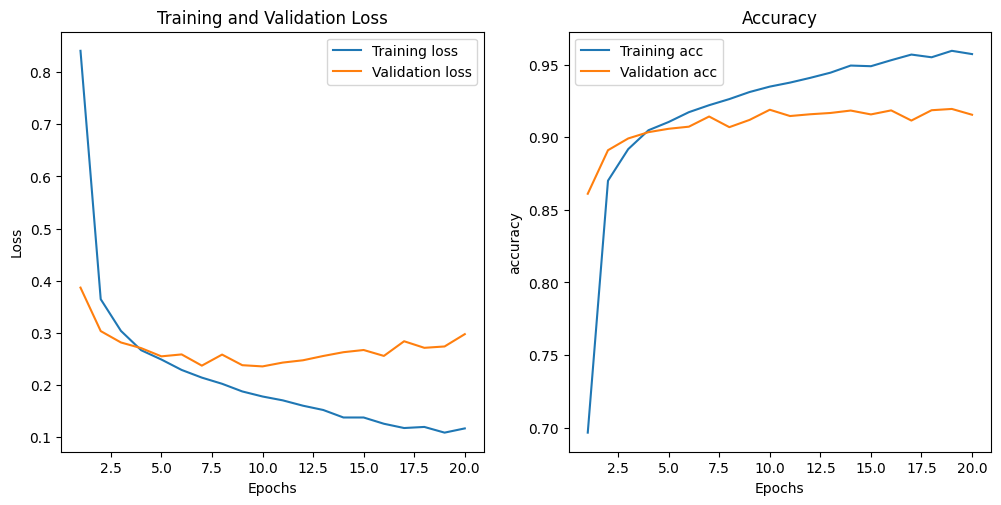

In [15]:
history_dict = history3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Висновок.
Створила згорткову нейромережу, що використовує VGG16 в якості згорткової основи. При включення "заморозки" найкращий результат, який вдалось досягти на тестовій виборці -

1.   Test loss:  0.3694029450416565
2.   Test accuracy:  0.8651999831199646
При "розморозці" 5-го шару  VGG16:
1.   Test loss:  0.3551034927368164
2.   Test accuracy:  0.9052000045776367

На жаль, при всіх варіантах архітектур, які я використали мені не вдалось досягти кращого результату, ніж при використанні простої згорткової моделі, а саме:
1.   Test loss:  0.21296799182891846
2.   Test accuracy:  0.9272000193595886

Також, не вдалось покращити результати, застосовуючи розширення виборки методом генерації редагованих зображень